In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
weather_data = pd.read_csv('weather_dataset.csv')
price_data = pd.read_csv('crop_dataset.csv')

In [18]:
import pandas as pd
from dateutil import parser
import numpy as np

# Assuming your DataFrame is named weather_data
date_formats = ["%d/%m/%Y", "%d-%b-%Y"]

# Define a function to parse the date, handling NaN values
def parse_date(x):
    try:
        return parser.parse(str(x), dayfirst=True, yearfirst=True)
    except (TypeError, ValueError):
        return np.nan

# Apply the parsing function to the date column
weather_data['date'] = weather_data['date'].apply(parse_date)

# Convert to a standard format, for example, 'YYYY-MM-DD'
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.strftime('%Y-%m-%d')

# Display the DataFrame
weather_data.head()


,date,prcp,tmin,tmax,tavg
0,NaN,NaN,19.1,28.4,22.9
1,NaN,0.0,NaN,26.5,21.7
2,NaN,0.0,16.4,26.5,21.0
3,NaN,0.0,NaN,27.4,20.8
4,NaN,0.0,14.2,26.1,20.4


In [15]:
price_data['Date'] = pd.to_datetime(price_data['Date'], format='%d/%m/%Y')
price_data.head()

,Commodity,Date,State,Min Price,Max Price,Avg Price,Unit
0,Tomato,2023-01-01,Karnataka,330,930,600,Quintal
1,Tomato,2023-01-02,Karnataka,800,1200,1000,Quintal
2,Tomato,2023-01-03,Karnataka,1000,1700,1350,Quintal
3,Tomato,2023-01-04,Karnataka,733,933,833,Quintal
4,Tomato,2023-01-05,Karnataka,1000,1400,1200,Quintal


In [16]:
merged_data = pd.merge(weather_data, price_data, on='Date', how='right')

In [17]:
merged_data.dtypes

District                  object
Date              datetime64[ns]
Rain                     float64
Min Temp                 float64
Max Temp                 float64
Min Humidity             float64
Max Humidity             float64
Min Wind Speed           float64
Max Wind Speed           float64
Commodity                 object
State                     object
Min Price                  int64
Max Price                  int64
Avg Price                  int64
Unit                      object
dtype: object

In [18]:
merged_data.isnull().sum()

District          0
Date              0
Rain              0
Min Temp          0
Max Temp          0
Min Humidity      0
Max Humidity      0
Min Wind Speed    0
Max Wind Speed    0
Commodity         0
State             0
Min Price         0
Max Price         0
Avg Price         0
Unit              0
dtype: int64

In [19]:
merged_data.dropna()

,District,Date,Rain,Min Temp,Max Temp,Min Humidity,Max Humidity,Min Wind Speed,Max Wind Speed,Commodity,State,Min Price,Max Price,Avg Price,Unit
0,Karnataka,2023-01-01,0.0,16.8,29.5,57.1,98.2,0.0,6.8,Tomato,Karnataka,330,930,600,Quintal
1,Karnataka,2023-01-02,0.0,7.7,26.9,39.8,95.4,0.0,10.8,Tomato,Karnataka,800,1200,1000,Quintal
2,Karnataka,2023-01-03,0.0,13.3,31.8,29.9,83.3,0.0,6.7,Tomato,Karnataka,1000,1700,1350,Quintal
3,Karnataka,2023-01-04,0.0,14.7,30.2,49.9,94.9,0.0,7.2,Tomato,Karnataka,733,933,833,Quintal
4,Karnataka,2023-01-05,0.0,15.0,31.4,42.8,94.9,0.0,9.5,Tomato,Karnataka,1000,1400,1200,Quintal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Karnataka,2023-11-26,0.0,16.9,30.3,62.7,98.7,0.0,7.4,Tomato,Karnataka,1500,2600,2000,Quintal
332,Karnataka,2023-11-27,35.1,16.9,31.3,54.5,96.4,0.0,14.9,Tomato,Karnataka,500,2600,1500,Quintal
333,Karnataka,2023-11-28,10.9,16.9,27.1,75.6,99.3,0.0,7.9,Tomato,Karnataka,1500,2600,2000,Quintal
334,Karnataka,2023-11-29,1.6,18.5,24.9,81.1,100.0,0.0,7.2,Tomato,Karnataka,2800,3300,3100,Quintal


In [21]:
date = merged_data['Date']
precipitation = merged_data['Rain ']
price = merged_data['Avg Price']

In [22]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

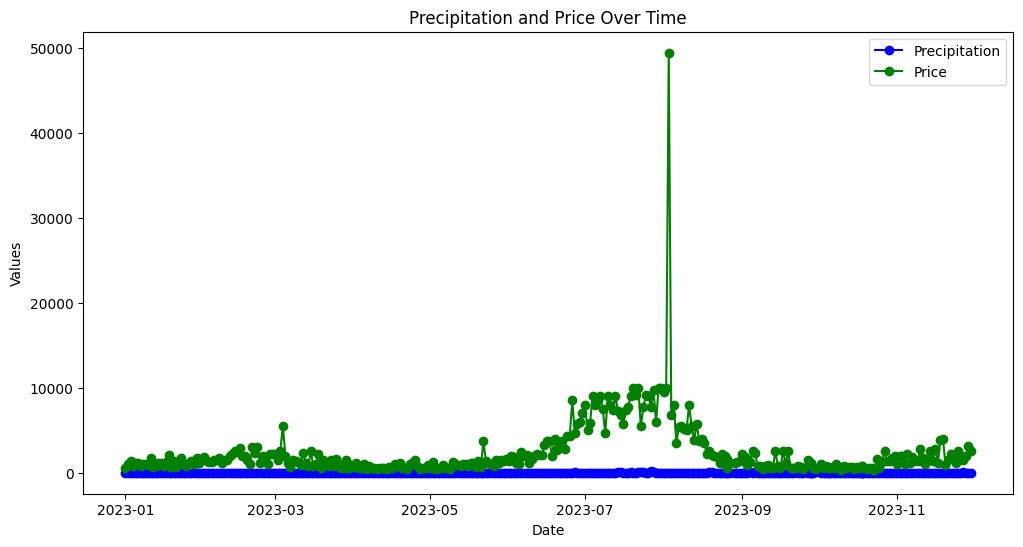

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(date, precipitation, label='Precipitation', marker='o', linestyle='-', color='blue')
plt.plot(date, price, label='Price', marker='o', linestyle='-', color='green')
plt.title('Precipitation and Price Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#to predict avg price
target_column = 'Avg Price'

#relvant features
features = ['Rain', 'Min Temp', 'Max Temp', 'Min Humidity', 'Max Humidity', 'Min Wind Speed', 'Max Wind Speed']

In [ ]:
#feature matrix X and target variable Y
X = df[features]
y = df[target_column]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()